In [2]:
import sys
sys.path.append('../')  # Add the parent directory to the system path


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.preprocess import DataProcessor

In [31]:
df = pd.read_xml("../data/KUH.XML")
df.head(2)

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None


In [42]:
processor = DataProcessor()
df_large , df_small =  processor.prep_data(df)

Extracting Data from Message Column.......


In [43]:
df_large.head()
len(df_large)

294

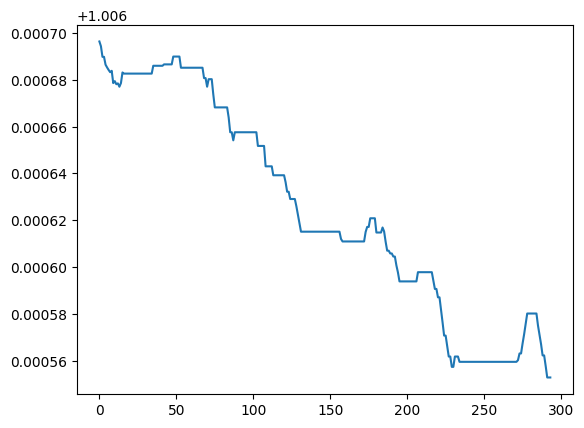

In [45]:
plt.plot(df_large.NewCFactor.values)

In [40]:
def replace_noisy_values(values_tmp):
    values = values_tmp.copy()
    last_descending_point = values[0]
    for i in range(1, len(values)):
        if values[i] >= last_descending_point:
            values[i] = last_descending_point
        else:
            last_descending_point = values[i]
    return values


In [46]:
res = replace_noisy_values(df_large.NewCFactor.values)


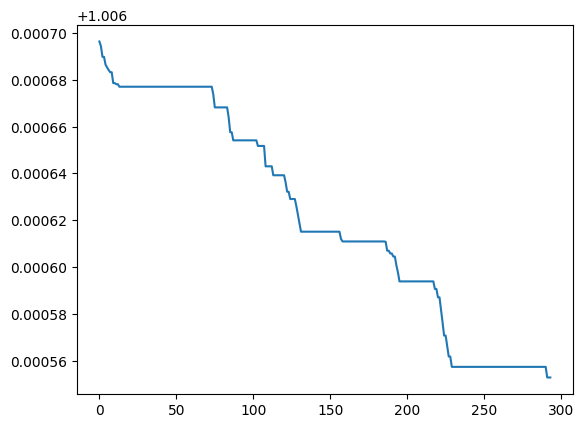

In [49]:
plt.plot(res)
# plt.plot(df_large.NewCFactor.values)



In [7]:
df = pd.read_xml("../data/KUH.XML")
df.head()

,StringValue,NumberOfParameters,Service,TechnicalEventType,TechnicalID,Description,TimeStamp,ProcessName,MemoField
0,Memo-field,NaN,None,None,NaN,None,None,None,None
1,None,226502.0,None,None,NaN,None,None,None,None
2,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.SessionManager.FSF_SERVER_...,2023-5-18 10:4:30.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] ... 3. SessionDetai...
3,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.SessionManager.FSF_SERVER_...,2023-5-18 10:4:21.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] ...onID : 3. Sessio...
4,None,NaN,Field Service,Technical Event,620000001.0,Services.FSF.Server.GenericUIDP.INFO: Successf...,2023-5-18 10:4:20.0,C:\Program Files\PMS\MIP\Philips.PmsMip.Privat...,[FREE_TEXT] \n[FREE_TEXT] Services.FSF.Server...
